## Camera Calibration

Extract object points and image points for camera calibration.

In [1]:
import pickle
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib qt

nx = 9
ny = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
#images = glob.glob('camera_cal/calibration*.jpg')
images = glob.glob('camera_cal/calibration*.jpg')

#print(images)
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    print(idx, fname)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

        print(write_name)
cv2.destroyAllWindows()


0 camera_cal/calibration1.jpg
1 camera_cal/calibration10.jpg
camera_cal/corners_found1.jpg
2 camera_cal/calibration11.jpg
camera_cal/corners_found2.jpg
3 camera_cal/calibration12.jpg
camera_cal/corners_found3.jpg
4 camera_cal/calibration13.jpg
camera_cal/corners_found4.jpg
5 camera_cal/calibration14.jpg
camera_cal/corners_found5.jpg
6 camera_cal/calibration15.jpg
camera_cal/corners_found6.jpg
7 camera_cal/calibration16.jpg
camera_cal/corners_found7.jpg
8 camera_cal/calibration17.jpg
camera_cal/corners_found8.jpg
9 camera_cal/calibration18.jpg
camera_cal/corners_found9.jpg
10 camera_cal/calibration19.jpg
camera_cal/corners_found10.jpg
11 camera_cal/calibration2.jpg
camera_cal/corners_found11.jpg
12 camera_cal/calibration20.jpg
camera_cal/corners_found12.jpg
13 camera_cal/calibration3.jpg
camera_cal/corners_found13.jpg
14 camera_cal/calibration4.jpg
15 camera_cal/calibration5.jpg
16 camera_cal/calibration6.jpg
camera_cal/corners_found16.jpg
17 camera_cal/calibration7.jpg
camera_cal/corne

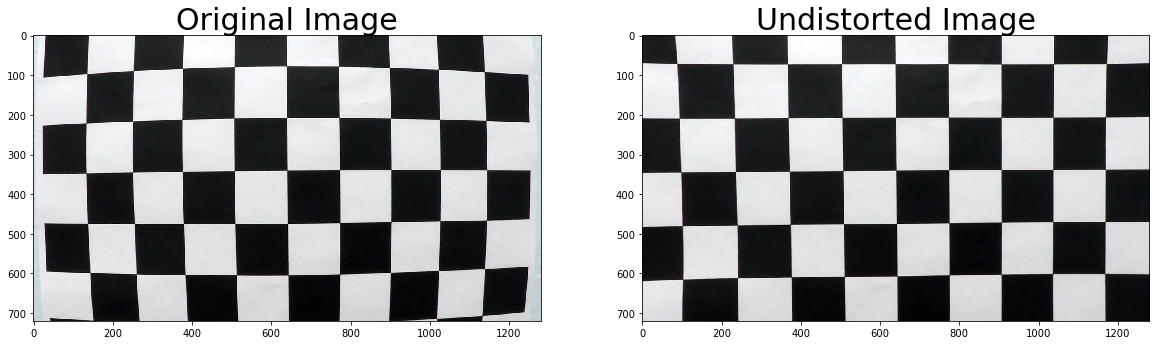

In [2]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/calibration1.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "output_images/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)


## Pipeline

### 1. Distortion Correction
Provide an example of a distortion-corrected image.

(720, 1280, 3)


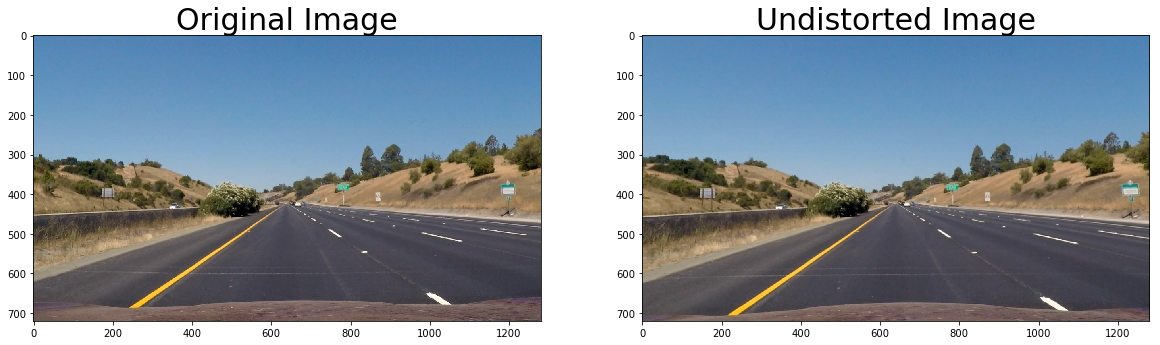

In [3]:
import pickle
import matplotlib.image as mpimg
%matplotlib inline



# Test undistortion on an image
#img = cv2.imread('test_images/straight_lines1.jpg')
img = mpimg.imread('test_images/straight_lines1.jpg') 
#img = mpimg.imread('test_images/test5.jpg') 
print(img.shape)
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

def lane_undistort(image):
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    return dst

dst = lane_undistort(img)
cv2.imwrite('output_images/straight_lines1_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "output_images/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Copy undistorted image for future usage
undist = np.copy(dst)

### 2. Color & Gradient Threshold

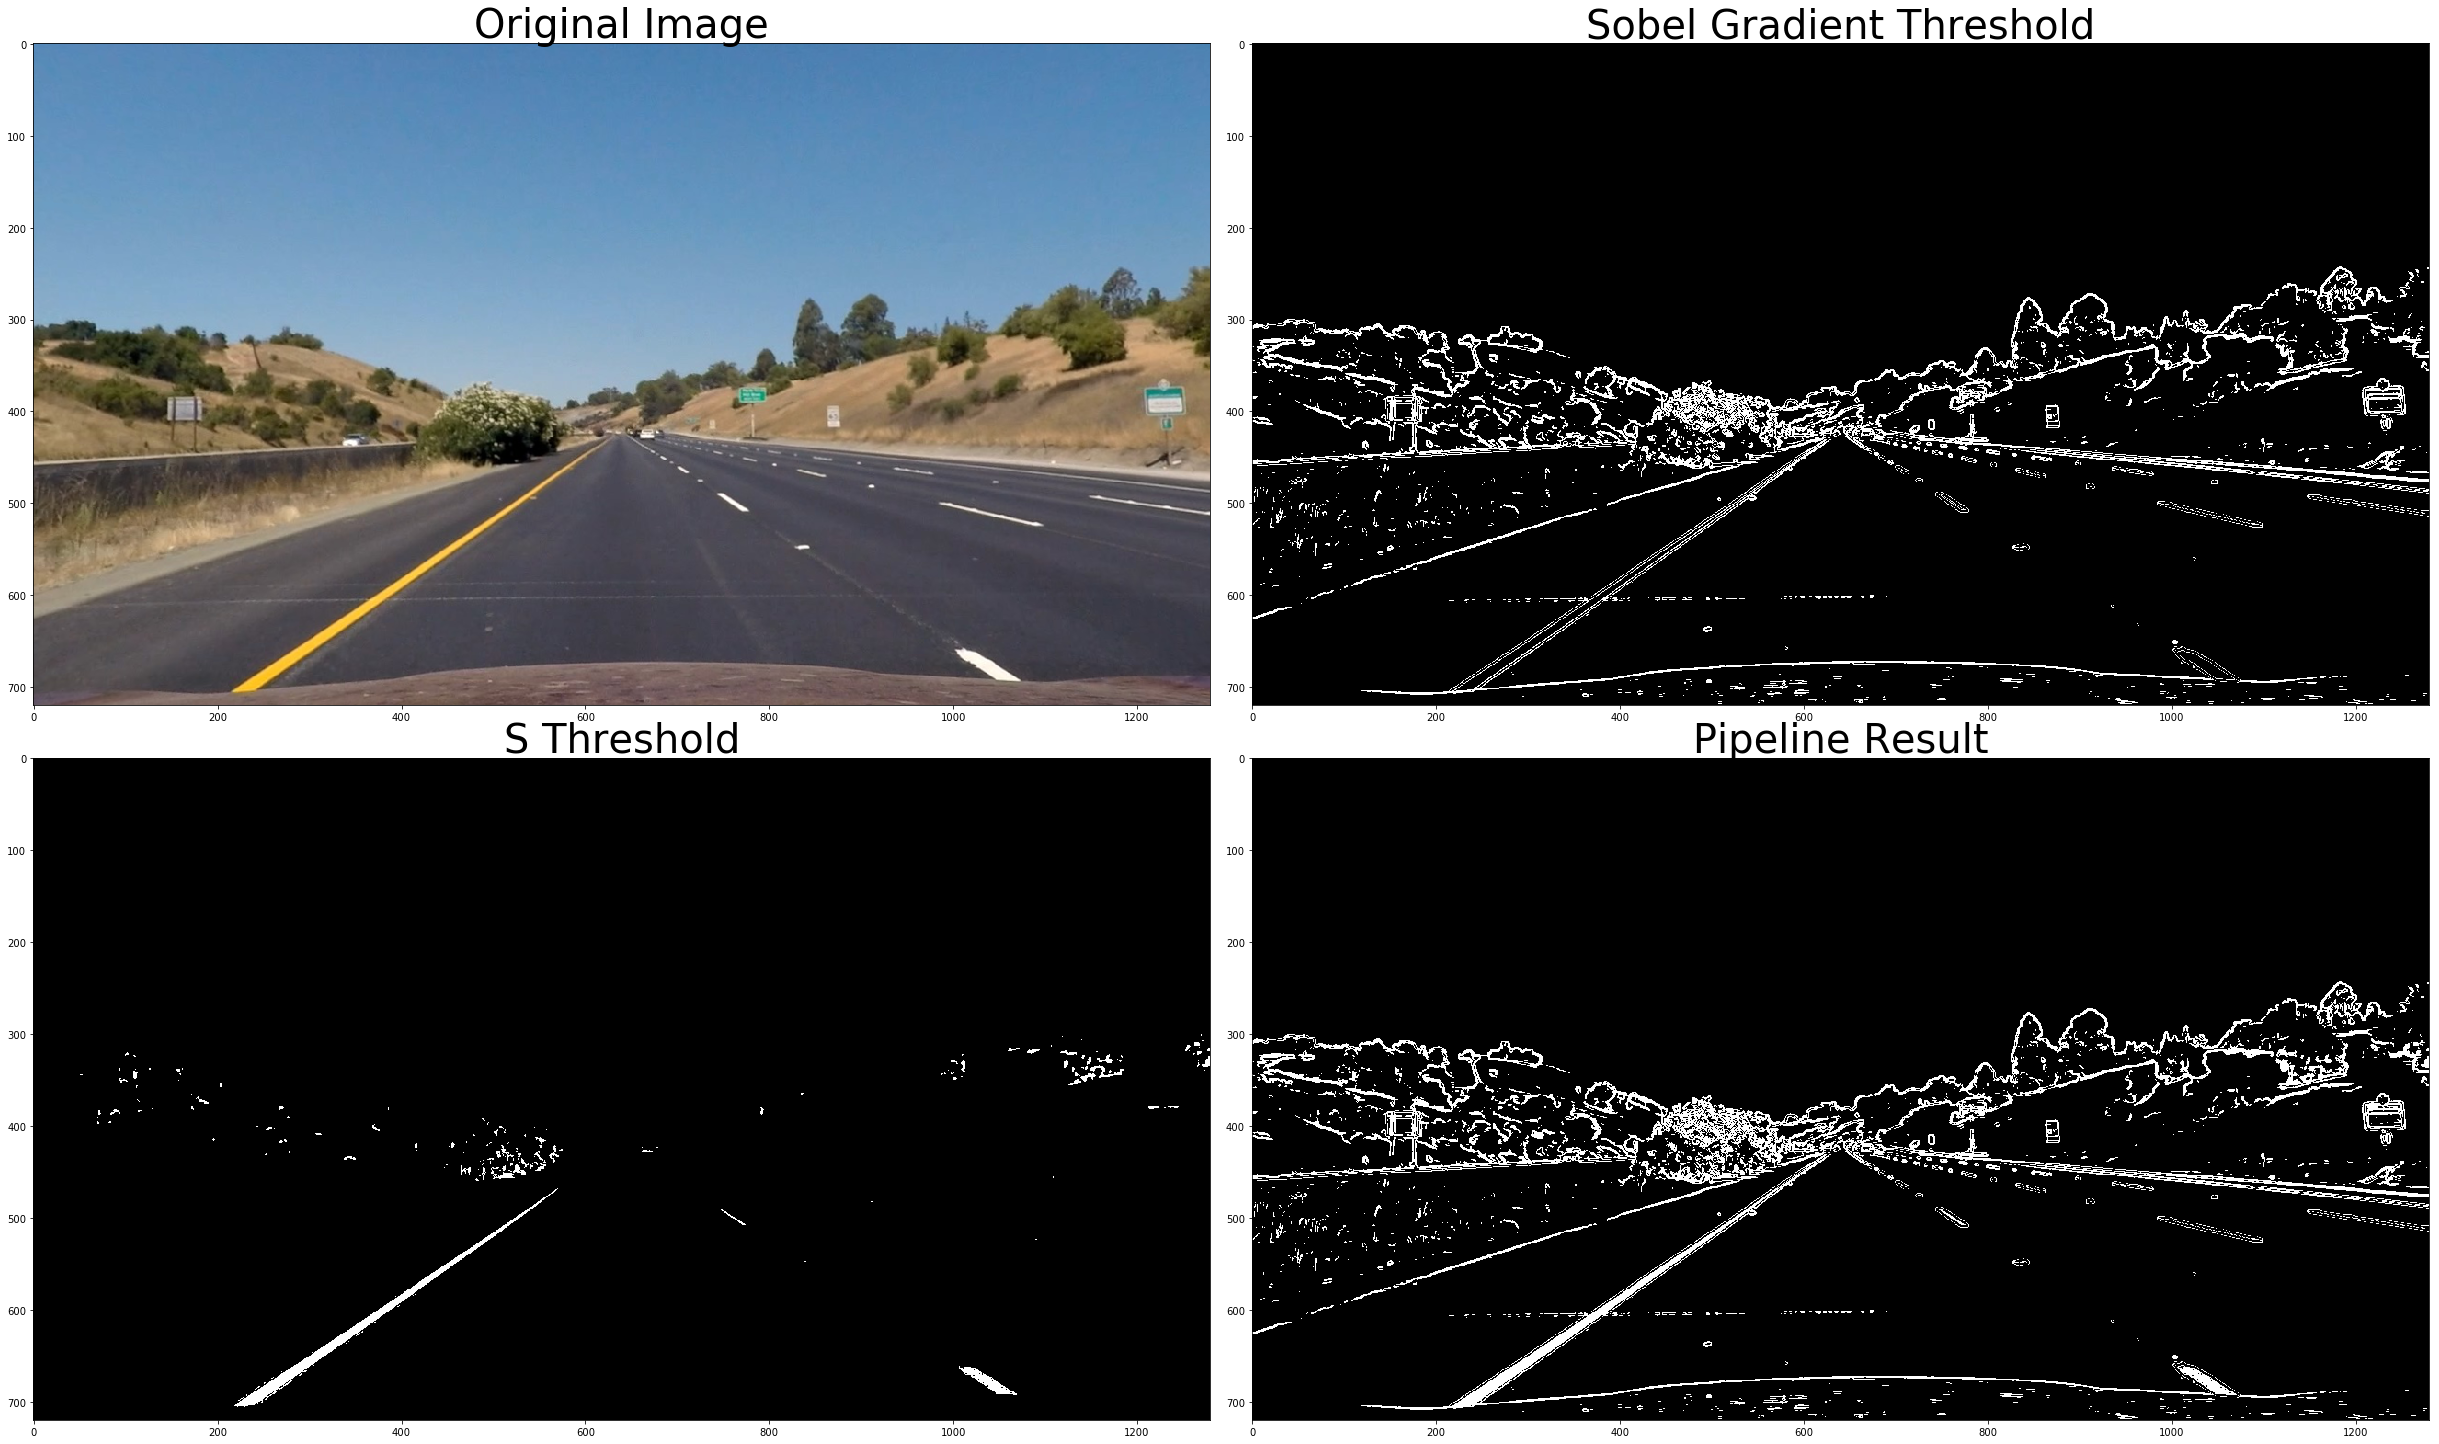

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

#image = mpimg.imread('bridge_shadow.jpg')
image = dst

# Edit this function to create your own pipeline.
def lane_colorgrad_thresh(img, sobel_kernel=3, s_thresh=(170, 255), mag_thresh=(30, 100)):
    # mag_thresh = (30,100)
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]

    # Sobel x
    #sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    #abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    #scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold x gradient
    #sxbinary = np.zeros_like(scaled_sobel)
    #sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, sobel_kernel)
    # 3) Calculate the magnitude 
    sobel = np.sqrt(sobelx * sobelx + sobely * sobely)
    #soble = sobelx
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1
        
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    color_binary = np.zeros_like(s_binary)
    color_binary[(s_binary == 1) | (mag_binary == 1)] = 1
    return color_binary, mag_binary, s_binary
    
result, mag_binary, s_binary = lane_colorgrad_thresh(image)

# Plot the result
#f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
f, axes = plt.subplots(2, 2, figsize=(34, 20))
f.tight_layout()

axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image', fontsize=40)

axes[0, 1].imshow(mag_binary, cmap='gray')
axes[0, 1].set_title('Sobel Gradient Threshold', fontsize=40)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

axes[1, 0].imshow(s_binary, cmap='gray')
axes[1, 0].set_title('S Threshold', fontsize=40)

axes[1, 1].imshow(result, cmap='gray')
axes[1, 1].set_title('Pipeline Result', fontsize=40)
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### 3. Perspective Transform

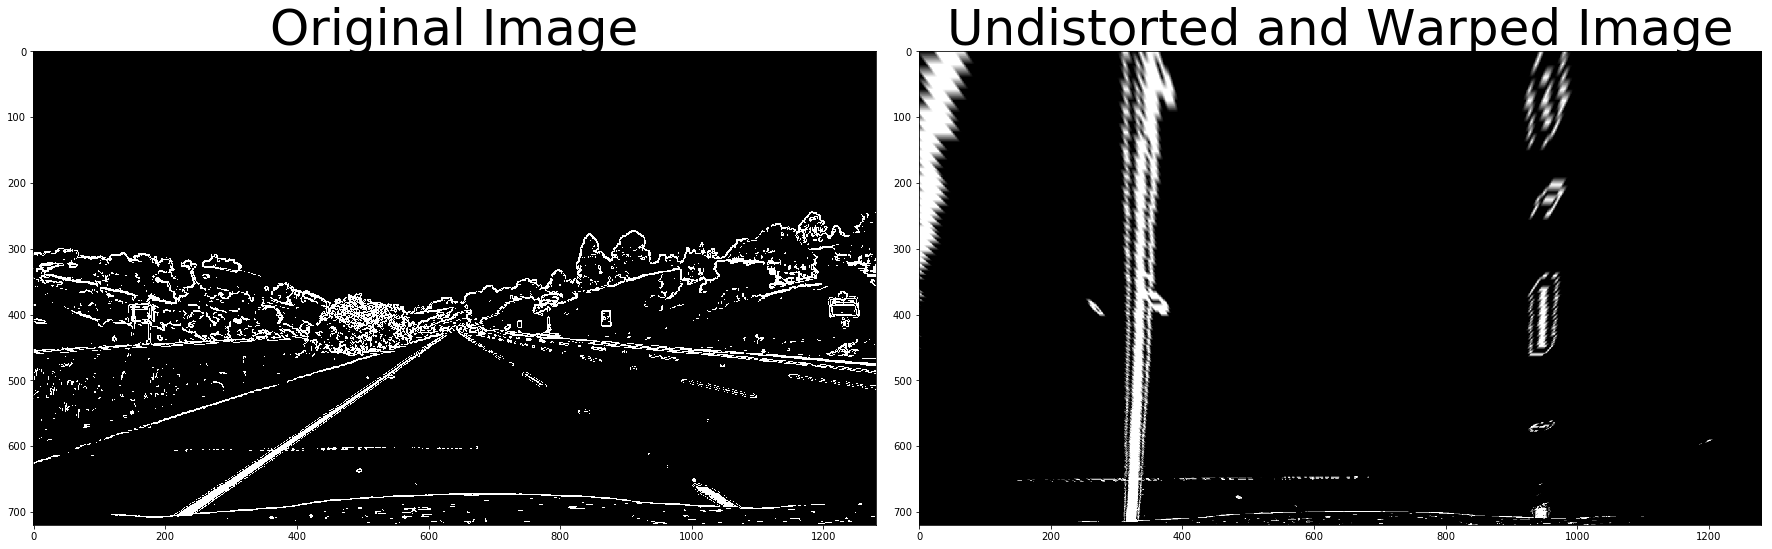

In [5]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
#dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
#mtx = dist_pickle["mtx"]
#dist = dist_pickle["dist"]

# Read in an image
#img = cv2.imread('camera_cal/calibration1.jpg')
#nx = 8 # the number of inside corners in x
#ny = 6 # the number of inside corners in y
#img = image
img = result
img_size = (img.shape[1], img.shape[0])

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def perspectvie_transform(img):
    #print(img.shape)

    # define 4 source points src = np.float32([[,],[,],[,],[,]])
    src = np.float32([[702, 460], [1127, 720], [203, 720], [578, 460]])
    #src = np.float32([[695, 460], [1127, 720], [203, 720], [585, 460]])
    # define 4 destination points dst = np.float32([[,],[,],[,],[,]])
    #dst = np.float32([[200,50],[200,200],[50,200],[50,50]])
    x_max = img.shape[1] * 3 / 4
    y_max = img.shape[0] - 0
    x_min = img.shape[1] * 1 / 4
    y_min = 0
    dst = np.float32([[x_max, y_min], [x_max, y_max], [x_min, y_max], [x_min, y_min]])
    #print(src)
    #print(dst)

    # Use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    # Use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    #delete the next two lines
    #M = None
    #warped = np.copy(img) 
    return warped, M, Minv

top_down, perspective_M, perspective_Minv = perspectvie_transform(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down, cmap='gray')
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## 4. Identify Lanes 

(720, 1280)


(720, 0)

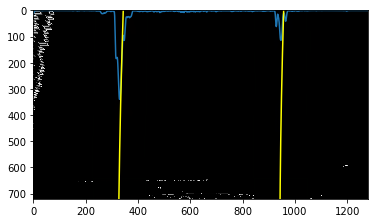

In [6]:
#import numpy as np
#histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
#plt.plot(histogram)

import numpy as np
import cv2
import matplotlib.pyplot as plt

binary_warped = top_down
print(binary_warped.shape)
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[np.int32(binary_warped.shape[0]/2):,:], axis=0)

plt.plot(histogram)

# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Visualization
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 1280)


(720, 0)

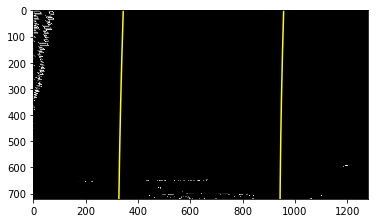

In [7]:
#import numpy as np
#histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
#plt.plot(histogram)

import numpy as np
import cv2
import matplotlib.pyplot as plt

binary_warped = top_down
print(binary_warped.shape)

def lane_detection(binary_warped, nwindows=9):
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[np.int32(binary_warped.shape[0]/2):,:], axis=0)
    #plt.plot(histogram)

    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    return left_fit, right_fit, leftx, lefty, rightx, righty

left_fit, right_fit, leftx, lefty, rightx, righty = lane_detection(binary_warped, nwindows=9)

# Visualization
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Measuring Curvature

In [8]:

# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
y_eval_m = y_eval * 3 / 4
x_center = binary_warped.shape[1] / 2

#left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
#right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
#print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30 / 720 # meters per pixel in y dimension
xm_per_pix = 3.7 / 700 # meters per pixel in x dimension

def lane_meas_curvature(leftx, lefty, rightx, righty, xm_per_pix, ym_per_pix):
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    avg_curverad = (left_curverad + right_curverad) / 2

    # Center offset
    left_offsetx_m = left_fit_cr[0]*(y_eval*ym_per_pix)**2 + left_fit_cr[1]*(y_eval*ym_per_pix) + left_fit_cr[2]
    right_offsetx_m = right_fit_cr[0]*(y_eval*ym_per_pix)**2 + right_fit_cr[1]*(y_eval*ym_per_pix) + right_fit_cr[2]
    center_offset_m = (right_offsetx_m + left_offsetx_m) / 2 - x_center * xm_per_pix

    return avg_curverad, left_offsetx_m, right_offsetx_m, left_fit_cr, right_fit_cr

avg_curverad, left_offsetx_m, right_offsetx_m, left_fit_cr, right_fit_cr = lane_meas_curvature(leftx, lefty, rightx, righty, xm_per_pix, ym_per_pix)
center_offset_m = (right_offsetx_m + left_offsetx_m) / 2 - x_center * xm_per_pix

# Now our radius of curvature is in meters
#print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
#print(right_offsetx, left_offsetx, center_offset_m)

label_1 = "Radius of Curvature = %d[m]" %(avg_curverad)
print(label_1)

if center_offset_m < 0:
    label_2 = ("Vehicle is %.2f[m] left of center" %(np.absolute(center_offset_m)))
else:
    label_2 = ("Vehicle is %.2f[m] right of center" %(np.absolute(center_offset_m)))
    #print('Vehicle is ', np.absolute(center_offset_m), 'm right of center')
print(label_2)


Radius of Curvature = 11546[m]
Vehicle is 0.03[m] left of center


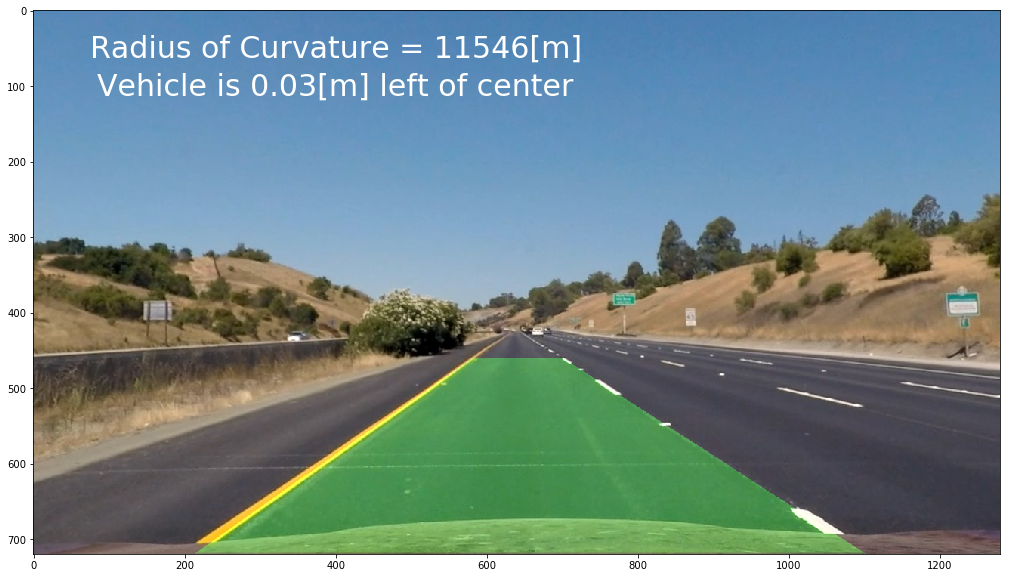

In [9]:
# Fill the current lane

warped = binary_warped
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, perspective_Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
#plt.imshow(result)


# Print text on image
text_x = 400
text_y1 = 50
text_y2 = 100

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(result)
ax1.text(text_x, text_y1, label_1, color='white', ha='center', va='center', fontsize=30)
ax1.text(text_x, text_y2, label_2, color='white', ha='center', va='center', fontsize=30)

#cv2.putText(frame, text, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, size, color, thickness)
#font = cv2.FONT_HERSHEY_SIMPLEX
#color = (255,255,255)
#cv2.putText(result, label_1, (text_x,text_y1), font, 1, color, 2)
#cv2.putText(result, label_2, (text_x,text_y2), font, 1, color, 2)


## Build Pipeline

## Test on Videos

In [10]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [11]:
class Line():
    # Parameters
    N_ITER = 8 # 4 number of last iteration for averaging

    MIN_LANE_WIDTH = 2.7
    MAX_LANE_WIDTH = 4.2 # 4.7
    MAX_DIFF = 60
    
    def __init__(self):
        # At least one has been saved
        self.saved = False
        self.savedCount = 0
        self.allIterGood = False
        self.iterCount = 0
        self.allIterFail = False
        self.iterFailCount = 0
        
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_left_fit = None  
        self.best_right_fit = None  

        #polynomial coefficients for the most recent fit
        #self.current_fit = [np.array([False])]
        #self.current_left_fit = np.array([[0,0,0]])
        #self.current_right_fit = np.array([[0,0,0]])
        #for i in range(N_ITER - 1):
        #    self.current_left_fit = np.vstack([self.current_left_fit,[0,0,0]])
        #    self.current_right_fit = np.vstack([self.current_right_fit,[0,0,0]])
        self.current_left_fit = np.zeros((self.N_ITER, 3))
        self.current_right_fit = np.zeros((self.N_ITER, 3))
        
        #radius of curvature of the line in some units
        self.radius_of_curvature = None
        self.radius_store = np.zeros(self.N_ITER)
        
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
        self.failcount = 0

    def save_measurement(self, left_fit, right_fit, avg_curverad, center_offset_m, left_fitx, right_fitx, ploty):
        self.detected = True
        self.savedCount = self.savedCount + 1
        if (self.savedCount >= self.N_ITER):
            self.saved = True
        
        self.iterCount = self.iterCount + 1
        self.iterFailCount = 0        

        if (self.iterCount >= self.N_ITER):
            self.allIterGood = True
            # Last N iteration is good (or saved), then reset Fail counter and Flag;
            if (self.allIterFail == True):
                self.allIterFail = False

        # X values
        #self.recent_xfitted_left = None 
        #self.bestx = None  
        
        ## Coefficients

        # Append one set of coef and remove oldest
        self.current_left_fit = np.delete(self.current_left_fit, 0, 0)        
        self.current_left_fit = np.vstack([self.current_left_fit, left_fit])

        self.current_right_fit = np.delete(self.current_right_fit, 0, 0)        
        self.current_right_fit = np.vstack([self.current_right_fit, right_fit])
        
        # Average coef
        self.best_left_fit = np.average(self.current_left_fit, axis=0)
        self.best_right_fit = np.average(self.current_right_fit, axis=0)
        #print(test)
        #self.current_fit = [left_fit_cr, right_fit_cr]
        
        ## Radius
        self.radius_store = np.delete(self.radius_store, 0)
        self.radius_store = np.append(self.radius_store, avg_curverad)
        
        self.radius_of_curvature = np.average(self.radius_store)
        #self.line_base_pos = 
        #self.diffs = np.array([0,0,0], dtype='float') 
        
        #self.allx = left_fitx
        self.ally = ploty
        return

    def load_saved_measurement(self):
        ## Use saved coef
        left_fit = self.best_left_fit
        right_fit = self.best_right_fit
        
        ploty = self.ally
        y_eval = np.max(ploty)
        
        print(left_fit)
        
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]        

        ## Use saved radius
        avg_curverad = self.radius_of_curvature
        
        ## Lane position
        left_offsetx = left_fit[0]*(y_eval)**2 + left_fit[1]*(y_eval) + left_fit[2]
        right_offsetx = right_fit[0]*(y_eval)**2 + right_fit[1]*(y_eval) + right_fit[2]
        #center_offset = (right_offsetx_m + left_offsetx_m) / 2 - x_center * xm_per_pix

        return avg_curverad, left_offsetx, right_offsetx, left_fitx, right_fitx

    def sanity_check_fit(self, left_fit_cur, right_fit_cur):
        checker = True
        valid = True

        #if self.allIterGood == False:
        if self.saved == False:
            return False, False, 0, 0
        
        ## Use saved coef
        left_fit = self.best_left_fit
        right_fit = self.best_right_fit
        
        ploty = self.ally
        y_eval = np.max(ploty)
        
        #print(left_fit)
        
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]        

        left_fitx_cur = left_fit_cur[0]*ploty**2 + left_fit_cur[1]*ploty + left_fit_cur[2]
        right_fitx_cur = right_fit_cur[0]*ploty**2 + right_fit_cur[1]*ploty + right_fit_cur[2]        
        
        diff_left = np.sum(np.absolute(np.subtract(left_fitx_cur, left_fitx))) / len(left_fitx)
        diff_right = np.sum(np.absolute(np.subtract(right_fitx_cur, right_fitx))) / len(right_fitx)

        if (diff_left > self.MAX_DIFF) or (diff_right > self.MAX_DIFF):
            checker = False
        return valid, checker, diff_left, diff_right
    
    def sanity_check(self, avg_curverad, left_offsetx_m1, right_offsetx_m1):
        checker = True
        
        # Check lane width
        lane_width = (right_offsetx_m1 - left_offsetx_m1)
        if (lane_width < self.MIN_LANE_WIDTH) or (lane_width > self.MAX_LANE_WIDTH):
            checker = False

        return checker
    
    def process_image(self, image):
        # NOTE: The output you return should be a color image (3 channel) for processing video below
        # TODO: put your pipeline here,
        # you should return the final output (image where lines are drawn on lanes)

        #reading in an image
        #image = mpimg.imread('test_images/solidWhiteRight.jpg')

        #printing out some stats and plotting
        print('This image is:', type(image), 'with dimensions:', image.shape)
        #plt.imshow(image)  # if you wanted to show a single color channel image called 'gray',
                            # for example, call as plt.imshow(gray, cmap='gray')

        # Undistortion
        img = lane_undistort(image)
        img_undist = np.copy(img)
        #plt.imshow(image_gray, cmap='gray')

        # Color & Gradiant Threshold
        img_thresh, mag_binary, s_binary = lane_colorgrad_thresh(img)

        # Perspective Transform
        top_down, perspective_M, perspective_Minv = perspectvie_transform(img_thresh)
        #plt.imshow(top_down, cmap='gray')

        # Lane detection
        binary_warped = top_down
        x_center = binary_warped.shape[1] / 2
        left_fit, right_fit, leftx, lefty, rightx, righty = lane_detection(binary_warped, nwindows=9)  

        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        # Visualization
        # Generate x and y values for plotting
        #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        #plt.imshow(out_img)
        #plt.plot(left_fitx, ploty, color='yellow')
        #plt.plot(right_fitx, ploty, color='yellow')
        #plt.xlim(0, 1280)
        #plt.ylim(720, 0)  

        # Measure Curverad, and Center Offset 
        avg_curverad, left_offsetx_m, right_offsetx_m, left_fit_cr, right_fit_cr = lane_meas_curvature(leftx, lefty, rightx, righty, xm_per_pix, ym_per_pix)
        center_offset_m = (right_offsetx_m + left_offsetx_m) / 2 - x_center * xm_per_pix
        label_5 = "Lane %.2f %.2f %.2f[m]" %(left_offsetx_m, right_offsetx_m, right_offsetx_m - left_offsetx_m)

        # Print - Calculated Coef
        label_4 = "Coef = (%.4f %.4f %.4f)(%.4f %.4f %.4f)" %(left_fitx[0], left_fitx[1], left_fitx[2], right_fit[0], right_fit[1], right_fit[2])
        
        # Sanity check
        checker = self.sanity_check(avg_curverad, left_offsetx_m, right_offsetx_m)
        checker_valid, checker_fit, diff_left, diff_right = self.sanity_check_fit(left_fit, right_fit)

        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left_cur = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right_cur = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts_cur = np.hstack((pts_left_cur, pts_right_cur))
        
        print(checker, checker_fit, self.saved, self.savedCount)

        #if ((checker == True) and (self.saved == False or checker_fit == True)):
        #if ((checker == True) and (checker_fit == True)):
        
        if ((checker == True) and (checker_fit == True)) or ((checker == True) and (self.saved == False)):
            self.save_measurement(left_fit, right_fit, avg_curverad, center_offset_m, left_fitx, right_fitx, ploty)

        if (checker == False) or (checker_valid == True and checker_fit == False):
            self.detected = False
            self.allIterGood = False
            self.iterCount = 0
            self.iterFailCount = self.iterFailCount + 1
            if (self.iterFailCount >= self.N_ITER):
                self.allIterFail = True
                self.saved = False
                self.savedCount = 0
            
            avg_curverad, left_offsetx, right_offsetx, left_fitx, right_fitx = self.load_saved_measurement()
            center_offset_m = ((right_offsetx + left_offsetx) / 2 - x_center) * xm_per_pix
            self.failcount = self.failcount + 1
            
            
        label_3 = "checker %r %r (%d) %d %d" %(checker, checker_fit, self.failcount, diff_left, diff_right)
        
        # ---------------------------------------------------------
        #update_image(avg_curverad, center_offset_m, binary_warped)
        
        # Now our radius of curvature is in meters
        label_1 = "Radius of Curvature = %d[m]" %(avg_curverad)
        #print(label_1)

        if center_offset_m < 0:
            label_2 = ("Vehicle is %.2f[m] left of center" %(np.absolute(center_offset_m)))
        else:
            label_2 = ("Vehicle is %.2f[m] right of center" %(np.absolute(center_offset_m)))
            #print('Vehicle is ', np.absolute(center_offset_m), 'm right of center')
        #print(label_2)   

        
        # Fill the current lane

        warped = binary_warped
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, perspective_Minv, (image.shape[1], image.shape[0])) 
                
        # Combine the result with the original image
        result = cv2.addWeighted(img_undist, 1, newwarp, 0.3, 0)
        #plt.imshow(result)

        
        ## Calculated color
        warped = binary_warped
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts_cur]), (255, 0, 0))
        
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, perspective_Minv, (image.shape[1], image.shape[0])) 
                
        # Combine the result with the original image
        #result = cv2.addWeighted(result, 1, newwarp, 0.3, 0)

        # Print text on image
        text_x = 50
        text_y1 = 50
        text_y2 = 100
        text_y3 = 150
        text_y4 = 200
        text_y5 = 250

        #cv2.putText(frame, text, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, size, color, thickness)
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (255,255,255)
        cv2.putText(result, label_1, (text_x,text_y1), font, 1, color, 2)
        cv2.putText(result, label_2, (text_x,text_y2), font, 1, color, 2)
        #cv2.putText(result, label_3, (text_x,text_y3), font, 1, color, 2)
        #cv2.putText(result, label_4, (text_x,text_y4), font, 1, color, 2)
        #cv2.putText(result, label_5, (text_x,text_y5), font, 1, color, 2)

        return result


(720, 1280, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)
True False False 0


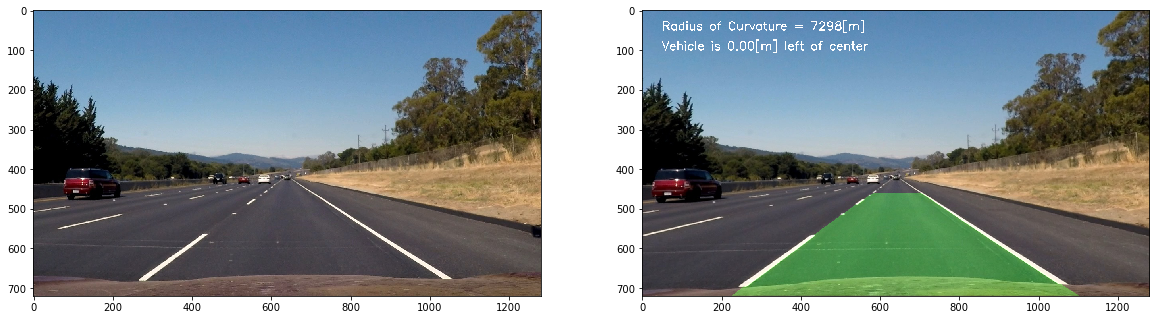

In [12]:

# Test undistortion on an image
#img = cv2.imread('test_images/straight_lines1.jpg')
img = mpimg.imread('test_images/straight_lines2.jpg') 
#img = mpimg.imread('test_images/test5.jpg') 
print(img.shape)
img_size = (img.shape[1], img.shape[0])

advImage = Line()
img_out = advImage.process_image(img)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
ax1.imshow(img)
ax2.imshow(img_out)


### project_video.mp4

In [ ]:
white_output = 'output_images/project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")

AdvLine = Line()
white_clip = clip1.fl_image(AdvLine.process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)